In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split # 訓練データとテストデータに分割
from sklearn.metrics import confusion_matrix # 混合行列

from sklearn.decomposition import PCA #主成分分析
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression # ロジスティック回帰

from sklearn.metrics import accuracy_score, precision_score
from sklearn.metrics import recall_score, f1_score
from sklearn.metrics import roc_auc_score

from sklearn.metrics import roc_curve

In [2]:
SEED = 42

# 赤ワインについてのロジスティック回帰分析

## データの確認

In [3]:
df_red = pd.read_csv('wine+quality/winequality-red.csv', header=0, delimiter=';')

In [4]:
df_red['class'] = [0 if i <= 5 else 1 for i in df_red['quality'].tolist()]
df_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [5]:
# それぞれに与える色を決める。
color_codes = {0:'#0000FF', 1:'#FF0000'}
colors = [color_codes[x] for x in df_red['class'].tolist()]

X = df_red.iloc[:, :10] # 説明変数
y = df_red.iloc[:, 12] # 目的変数

scaler = StandardScaler() # 特徴量データの標準化
X = scaler.fit_transform(X)

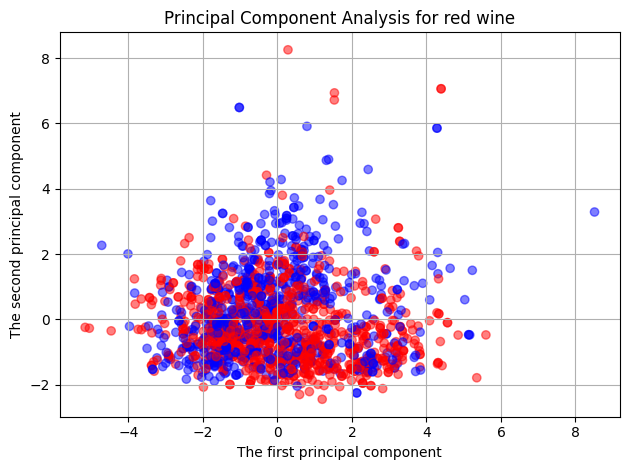

In [6]:
pca = PCA()
pca.fit(X)

# データを主成分空間に写像 = 次元圧縮
feature = pca.transform(X)

# 図示
plt.scatter(feature[:, 0], feature[:, 1], alpha=0.5, color=colors)
plt.title("Principal Component Analysis for red wine")
plt.xlabel("The first principal component")
plt.ylabel("The second principal component")
plt.grid()
plt.tight_layout()
plt.savefig("fig/PCA_red.pdf")

## 学習 & 評価

In [7]:
# 訓練データ・テストデータへのランダムな分割
X_train, X_test, y_train, y_test = train_test_split(X, y, \
                                                test_size=0.2, random_state=SEED, shuffle=True)

In [8]:
clf = LogisticRegression() #モデルの生成
clf.fit(X_train, y_train) #学習

y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)[:,1]

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(accuracy, precision, recall, f1)

0.74375 0.7803468208092486 0.7541899441340782 0.7670454545454546


In [9]:
pd.DataFrame(confusion_matrix(y_pred, y_test), \
             index=['predicted 0', 'predicted 1'], columns=['real 0', 'real 1'])

,real 0,real 1
predicted 0,103,44
predicted 1,38,135


0.803557985657118


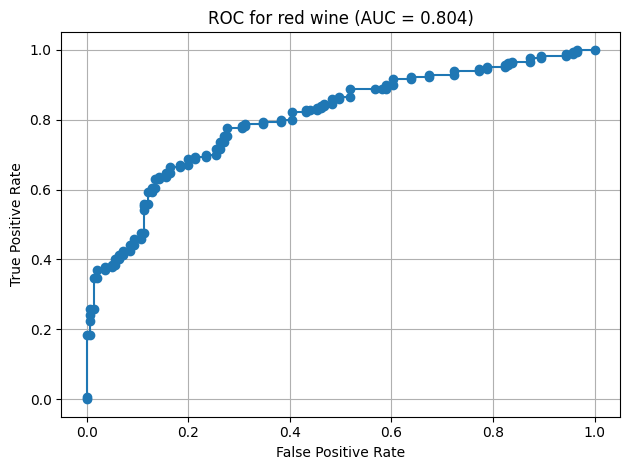

In [10]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, marker='o')
plt.grid()
plt.title(f"ROC for red wine (AUC = {roc_auc:.3f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.tight_layout()
plt.savefig("fig/ROC_red.pdf")
print(roc_auc)

# 白ワインについてのロジスティック回帰分析

## データの確認

In [11]:
# 白ワインについても同様の解析を行う
df_white = pd.read_csv('wine+quality/winequality-white.csv', header=0, delimiter=';')

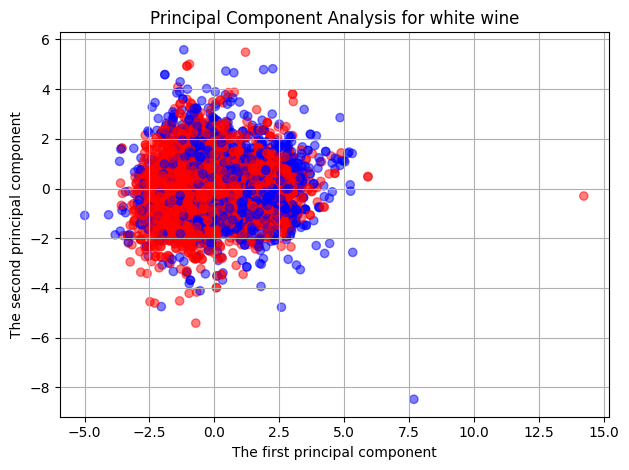

In [12]:
df_white['class'] = [0 if i <= 5 else 1 for i in df_white['quality'].tolist()]
color_codes = {0:'#0000FF', 1:'#FF0000'}
colors = [color_codes[x] for x in df_white['class'].tolist()]

X = df_white.iloc[:, :10] # 説明変数
y = df_white.iloc[:, 12] # 目的変数

scaler = StandardScaler() # 特徴量データの標準化
X = scaler.fit_transform(X)

pca = PCA()
pca.fit(X)

# データを主成分空間に写像 = 次元圧縮
feature = pca.transform(X)

# 図示
plt.scatter(feature[:, 0], feature[:, 1], alpha=0.5, color=colors)
plt.title("Principal Component Analysis for white wine")
plt.xlabel("The first principal component")
plt.ylabel("The second principal component")
plt.grid()
plt.tight_layout()
plt.savefig("fig/PCA_white.pdf")

## 学習 & 評価

In [13]:
# 訓練データ・テストデータへのランダムな分割
X_train, X_test, y_train, y_test = train_test_split(X, y, \
                                                test_size=0.2, random_state=SEED, shuffle=True)

clf = LogisticRegression() #モデルの生成
clf.fit(X_train, y_train) #学習

y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)[:,1]

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(accuracy, precision, recall, f1)
pd.DataFrame(confusion_matrix(y_pred, y_test), \
             index=['predicted 0', 'predicted 1'], columns=['real 0', 'real 1'])

0.746938775510204 0.7736351531291611 0.881638846737481 0.8241134751773049


,real 0,real 1
predicted 0,151,78
predicted 1,170,581


0.8007743253017174


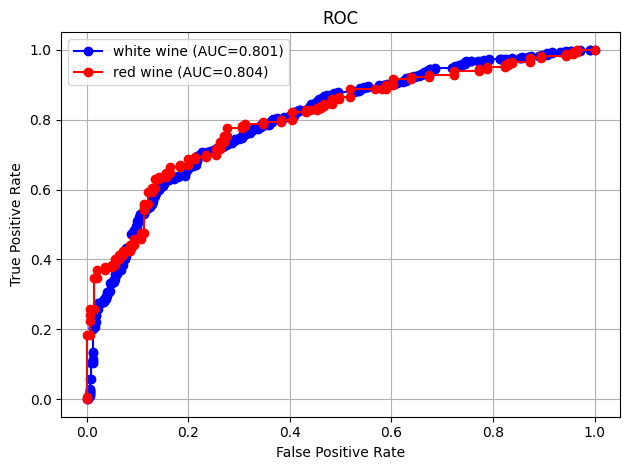

In [15]:
fpr_w, tpr_w, thresholds_w = roc_curve(y_test, y_pred_proba)

plt.plot(fpr_w, tpr_w, marker='o', label="white wine (AUC=0.801)", color='blue')
plt.plot(fpr, tpr, marker='o', label="red wine (AUC=0.804)", color='red')
plt.grid()
plt.title(f"ROC")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.tight_layout()
plt.savefig("fig/ROC.pdf")
print(roc_auc)